In [3]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define the path to the dataset
dataset_path = r"D:\download\JPEGImages (2)\test"

# List of car brands available in the dataset
car_brands = [
    "AUDI", "BAOJUN", "Benz", "BMW", "Buick", "BYD", "Cadillac", "Changan",
    "CHERY", "Chevrolet", "Citroen", "Coupe", "FAWHaima", "Ford", "Geely",
    "GMC", "HAVAL", "HONDA", "Hyundai", "INFINITI", "JEEP", "KIA", "Lexus",
    "Lincoln", "Mazda", "MG", "Mitsubishi", "Nissan", "PEUGEOT", "Porsche",
    "Qoros", "RANGEROVER", "Renault", "ROEWE", "Saab", "SKODA", "SoueastMotor",
    "Subaru", "SUZUKI", "TOYOTA", "TRUMCHI", "Venucia", "Volkswagen", "VOLVO", "WuLing"
]

def load_images_and_labels(dataset_path, car_brands, num_samples=10, target_size=(512, 512)):
    images = []
    labels = []
    
    # 实例化ImageDataGenerator
    datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True
    )
    
    for brand in car_brands:
        brand_path = os.path.join(dataset_path, brand)
        if not os.path.exists(brand_path):
            continue
        
        # Loop through each file in the brand folder
        for image_file in tqdm(os.listdir(brand_path), desc=f"Loading {brand}", unit='files'):
            if len(images) >= num_samples:  # Only load a certain number of samples for demonstration
                break
            image_path = os.path.join(brand_path, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                # Resize the image to the target size
                image_resized = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)
                image_array = img_to_array(image_resized)
                
                # 使用ImageDataGenerator参数进行预处理
                image_transformed = datagen.random_transform(image_array)
                
                images.append(image_transformed)
                labels.append(brand)
    
    return images, labels

# Example augmentation function for images
def augment_images(images):
    augmented_images = []
    
    for image in images:
        # Flip the image horizontally
        flipped = cv2.flip(image, 1)
        
        # Convert the image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Rotate the image by 90 degrees
        rows, cols = image.shape[:2]
        M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
        rotated = cv2.warpAffine(image, M, (cols, rows))
        
        # Append the original and augmented images to the list
        augmented_images.extend([image, flipped, gray, rotated])
    
    return augmented_images

# Load images and labels from the dataset
images, labels = load_images_and_labels(dataset_path, car_brands, num_samples=45000)





Loading Coupe:  57%|██████████████████████████████████▊                          | 570/1000 [00:23<00:17, 24.02files/s]


MemoryError: Unable to allocate 3.00 MiB for an array with shape (3, 512, 512) and data type float32

In [4]:
# Augment the images
augmented_images = augment_images(images)

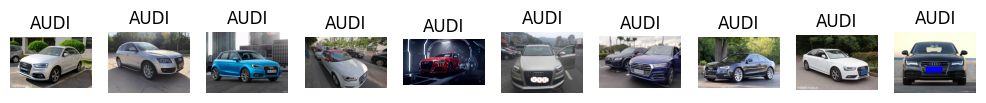

In [9]:
# Displaying a sample of processed images
def display_sample_images(images, labels, num_samples=5):
    plt.figure(figsize=(15, 10))
    for i in range(min(num_samples, len(images))):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

# Display a sample of the loaded images
display_sample_images(images, labels, num_samples=12)

In [9]:
from rembg import remove

#待处理的图片路径
input_path = 'D:\\download\\JPEGImages (2)\\JPEGImages\\045000.jpg'
#处理后存储的图片路径
output_path = 'D:\\download\\JPEGImages (2)\\aaa\\output.jpg'

with open(input_path, 'rb') as i:
    with open(output_path, 'wb') as o:
        input = i.read()
        output = remove(input)
        o.write(output)

100%|########################################| 176M/176M [00:00<00:00, 176GB/s]


In [10]:
from rembg import remove
import os
import glob

# 待处理的图片文件夹路径
input_folder_path = 'D:\\download\\JPEGImages (2)\\test\\AUDI'
# 处理后的图片存储文件夹路径
output_folder_path = 'D:\\download\\JPEGImages (2)\\aaa\\AUDI'

# 创建输出文件夹（如果不存在）
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# 遍历文件夹中的所有图片
for input_path in glob.glob(os.path.join(input_folder_path, '*.jpg')):
    # 生成输出文件路径
    output_path = os.path.join(output_folder_path, os.path.basename(input_path))

    with open(input_path, 'rb') as i:
        with open(output_path, 'wb') as o:
            input_image = i.read()
            output_image = remove(input_image)
            o.write(output_image)

    print(f'Processed {input_path}')


Processed D:\download\JPEGImages (2)\test\AUDI\001001.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001002.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001003.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001004.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001005.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001006.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001007.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001008.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001009.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001010.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001011.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001012.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001013.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001014.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001015.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001016.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001017.jpg
Processed D:\d

In [1]:
from rembg import remove
import os
import glob
from PIL import Image
import io
import os
# 待处理的图片文件夹路径
base_input_folder_path = 'D:\\download\\JPEGImages (2)\\test'
# 处理后的图片存储文件夹路径
base_output_folder_path = 'D:\\download\\JPEGImages (2)\\aaa'

# 定义所有分类的列表
categories = [
    "AUDI"
]

# 遍历所有分类
for category in categories:
    input_folder_path = os.path.join(base_input_folder_path, category)
    output_folder_path = os.path.join(base_output_folder_path, category)

    # 创建输出文件夹（如果不存在）
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    # 遍历文件夹中的所有图片
    for input_path in glob.glob(os.path.join(input_folder_path, '*.jpg')):
        # 生成输出文件路径
        output_path = os.path.join(output_folder_path, os.path.basename(input_path))

        with open(input_path, 'rb') as i:
            input_image = i.read()
            output_image = remove(input_image)

            # 使用Pillow处理图像
            img = Image.open(io.BytesIO(output_image))
            # 转换RGBA到RGB
            if img.mode == 'RGBA':
                img = img.convert('RGB')
            # 将处理后的图片保存为JPEG格式，降低质量以减小文件大小
            with open(output_path, 'wb') as o:
                img.save(o, format='JPEG', quality=75, optimize=True, progressive=True)

        print(f'Processed {input_path}')


Processed D:\download\JPEGImages (2)\test\AUDI\001001.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001002.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001003.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001004.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001005.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001006.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001007.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001008.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001009.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001010.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001011.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001012.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001013.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001014.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001015.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001016.jpg
Processed D:\download\JPEGImages (2)\test\AUDI\001017.jpg
Processed D:\d

In [ ]:
from rembg import remove
import os
import glob
from PIL import Image
import io
import os
# 待处理的图片文件夹路径
base_input_folder_path = 'D:\\download\\JPEGImages (2)\\test'
# 处理后的图片存储文件夹路径
base_output_folder_path = 'D:\\download\\JPEGImages (2)\\aaa'

# 定义所有分类的列表
categories = [
    "AUDI"
]

# 遍历所有分类
for category in categories:
    input_folder_path = os.path.join(base_input_folder_path, category)
    output_folder_path = os.path.join(base_output_folder_path, category)

    # 创建输出文件夹（如果不存在）
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    # 遍历文件夹中的所有图片
    for input_path in glob.glob(os.path.join(input_folder_path, '*.jpg')):
        # 生成输出文件路径
        output_path = os.path.join(output_folder_path, os.path.basename(input_path))

        with open(input_path, 'rb') as i:
            input_image = i.read()
            output_image = remove(input_image)

            # 使用Pillow处理图像
            img = Image.open(io.BytesIO(output_image))
            # 转换RGBA到RGB
            if img.mode == 'RGBA':
                img = img.convert('RGB')
            # 将处理后的图片保存为JPEG格式，降低质量以减小文件大小
            with open(output_path, 'wb') as o:
                img.save(o, format='JPEG', quality=75, optimize=True, progressive=True)

        print(f'Processed {input_path}')


In [16]:
import json
import os

def convert_box(size, box):
    dw = 1. / size[0]
    dh = 1. / size[1]
    x = (box[0] + box[1]) / 2.0
    y = (box[2] + box[3]) / 2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return (x, y, w, h)

# Assuming the directory containing the JSON files is 'annotations'
json_files_directory = 'D:\\download\\JPEGImages (2)\\Processing\\BAOJUNlabel'
# And the directory where you want to save the YOLO format files is 'labels'
yolo_labels_directory = 'D:\\download\\JPEGImages (2)\\Processing\\BAOJUNlabel_to_yolo'
os.makedirs(yolo_labels_directory, exist_ok=True)

# Convert each JSON file
for json_file in os.listdir(json_files_directory):
    if json_file.endswith('.json'):
        json_path = os.path.join(json_files_directory, json_file)
        with open(json_path, 'r') as file:
            data = json.load(file)
        
        image_size = (data['imageWidth'], data['imageHeight'])
        yolo_labels = []
        for shape in data['shapes']:
            # Assuming class_id for car_logo is 0
            class_id = 0
            points = shape['points']
            box = convert_box(image_size, [points[0][0], points[1][0], points[0][1], points[1][1]])
            yolo_label = (class_id,) + box
            yolo_labels.append(yolo_label)
        
        yolo_filename = json_file.replace('.json', '.txt')
        yolo_path = os.path.join(yolo_labels_directory, yolo_filename)
        with open(yolo_path, 'w') as file:
            for yolo_label in yolo_labels:
                file.write(' '.join(map(str, yolo_label)) + '\n')


In [26]:
from ultralytics import YOLO

# 初始化模型
model = YOLO('yolov8n.yaml', task='detect')  # 加载YOLOv8模型


model.train()

# 保存模型到指定路径
model_path = 'D:\\download\\JPEGImages (2)\\Processing\\saved_model'  # 保存模型的路径
model.save(model_path)


KeyError: 'backbone'

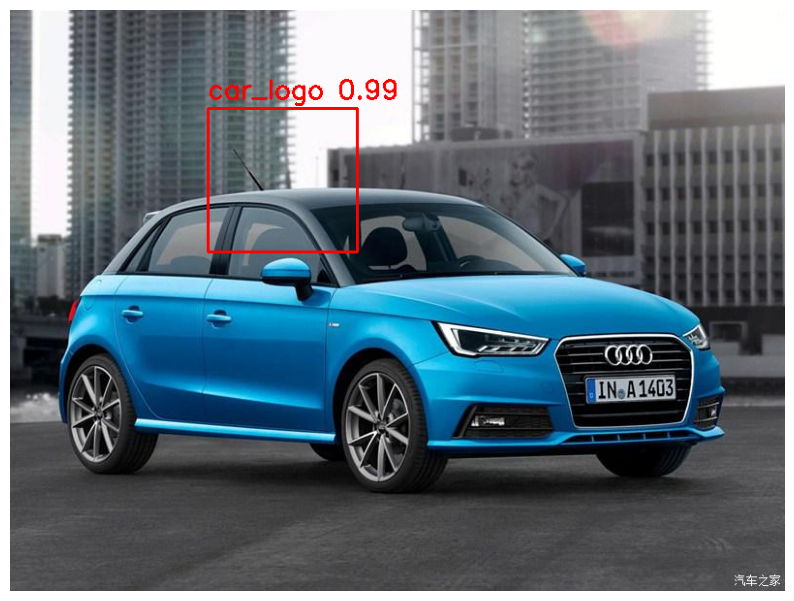

In [14]:

import cv2
import matplotlib.pyplot as plt

# 假设results.xyxy[0]是检测结果的tensor，每行是[bbox_x1, bbox_y1, bbox_x2, bbox_y2, confidence, class]
# 这是假设的输出，你需要从你的模型获取实际输出
detections = [
    [204, 102, 358, 250, 0.99, 'car_logo'],
    # ... 其他检测
]

# 读取原始图像
img = cv2.imread('D:\\download\\JPEGImages (2)\\test\\AUDI\\001003.jpg')  # 替换为你的图像路径
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 将BGR图像转换为RGB格式

# 创建画布
plt.figure(figsize=(10, 10))

# 在图像上绘制每个边界框和标签
for detection in detections:
    x1, y1, x2, y2, conf, label = detection
    # 绘制边界框
    img = cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
    # 绘制标签和置信度
    cv2.putText(img, f'{label} {conf:.2f}', (int(x1), int(y1-10)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

# 展示图像
plt.imshow(img)
plt.axis('off')  # 不显示坐标轴
plt.show()

